In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
import os
import sys
import pandas as pd
import pathlib
from pathlib import Path


In [3]:
###### folder path

#for var_file in os.listdir('/Volumes/Nereide/dataset/CMEMS_REANALYSIS/TEMPERATURE_SINCE_1999'):

for var_file in os.listdir('folder_path'):
    if var_file.endswith('.nc'):
        print(var_file)

1999_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1989_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2009_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2019_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2018_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2008_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1988_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1998_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2017_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2007_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1987_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1997_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1996_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2006_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2016_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2004_daily_cmems_reanalysis_temperature_AdriaticSea.nc
2014_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1994_daily_cmems_reanalysis_temperature_AdriaticSea.nc
1995_daily

In [4]:
###### time covarage: 33 (chunk size) year means 12053 days

### all .nc files 

var_nc=[os.path.join(var_file) for f in var_file]


#var_ds=xr.open_mfdataset('/Volumes/Nereide/dataset/CMEMS_REANALYSIS/TEMPERATURE_SINCE_1999/*.nc', parallel=True)

var_ds=xr.open_mfdataset('folder_path/*.nc', parallel=True)



In [5]:
lon_name = 'lon'
lat_name = 'lat'
time_name = 'time'
depth_name = 'depth'

In [6]:
##### fix the dimension 

#### lat &long are fix
###  time  by depth 


temp_mean = var_ds.mean(dim=(lat_name, lon_name), skipna=True)
temp_mean

<xarray.Dataset>
Dimensions:  (depth: 74, time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
  * depth    (depth) float32 1.018 3.166 5.465 7.92 ... 937.9 971.1 1.005e+03
Data variables:
    thetao   (time, depth) float32 dask.array<chunksize=(365, 74), meta=np.ndarray>

In [7]:
#first layer
depth_sel = 1.01823

temp_mean_sel = temp_mean.sel(depth=depth_sel, method="nearest")

temp_mean_sel.time

<xarray.DataArray 'time' (time: 12053)>
array(['1987-01-01T12:00:00.000000000', '1987-01-02T12:00:00.000000000',
       '1987-01-03T12:00:00.000000000', ..., '2019-12-29T12:00:00.000000000',
       '2019-12-30T12:00:00.000000000', '2019-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 1.018
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [8]:
temp_mean_sel.thetao

<xarray.DataArray 'thetao' (time: 12053)>
dask.array<getitem, shape=(12053,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 1.018

In [9]:
temp_mean_sel.depth

<xarray.DataArray 'depth' ()>
array(1.0182366, dtype=float32)
Coordinates:
    depth    float32 1.018
Attributes:
    units:          m
    standard_name:  depth
    long_name:      depth
    axis:           Z
    positive:       down

In [10]:
# Plot configuration
width_inch = 16
height_inch = 8

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

label_fontstyle = {
    "fontsize": "12",
    "labelpad": 30
}

In [11]:
def checkDir(outPath):
    if not os.path.exists(outPath):
        os.makedirs(outPath)

In [12]:
#time series within temperature at first layer ocean model datasets

timesteps = temp_mean_sel.time

sig1 = temp_mean_sel.thetao


In [13]:
sig1

<xarray.DataArray 'thetao' (time: 12053)>
dask.array<getitem, shape=(12053,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 1.018

In [14]:
temp_mean_sel.depth

<xarray.DataArray 'depth' ()>
array(1.0182366, dtype=float32)
Coordinates:
    depth    float32 1.018
Attributes:
    units:          m
    standard_name:  depth
    long_name:      depth
    axis:           Z
    positive:       down

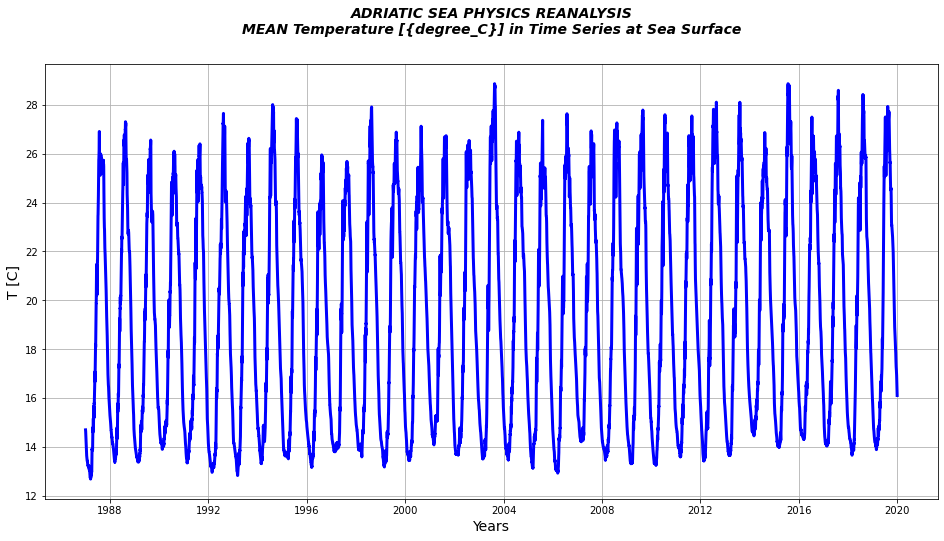

In [15]:
fig, ax1 = plt.subplots(figsize=(width_inch, height_inch))

timesteps = temp_mean_sel.time

sig1 = temp_mean_sel.thetao

color1 = 'b'

ax1.plot(timesteps, sig1, color1,linewidth=3)
ax1.set_ylabel('T [C]', fontsize=14)
ax1.set_xlabel("Years", fontsize=14)
title = "ADRIATIC SEA PHYSICS REANALYSIS\nMEAN Temperature [{degree_C}] in Time Series at Sea Surface"

plt.title(title, **title_fontstyle)


plt.grid()

plt.savefig('temperature_in_ts_from1987to2019_over AdriaticSea.png')


plt.show()

plt.close()

In [16]:
new_filename_1 = 'TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc'
print ('saving to ', new_filename_1)
temp_mean_sel.to_netcdf(path=new_filename_1)
print ('finished saving')

saving to  TS_cmems_reanalysis_temperature_since1987to2019_AdriaticSea.nc
finished saving


In [17]:
import cf, cfplot as cfp


In [18]:
f = cf.read('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc')[0] 


In [19]:
print(f)

Field: ncvar%thetao (ncvar%thetao)
----------------------------------
Data            : ncvar%thetao(time(12053))
Dimension coords: time(12053) = [1987-01-01 12:00:00, ..., 2019-12-31 12:00:00] proleptic_gregorian
                : depth(1) = [1.0182366371154785] m


In [20]:
f.dump()

----------------------------------
Field: ncvar%thetao (ncvar%thetao)
----------------------------------
_FillValue = nan

Data(time(12053)) = [14.696688652038574, ..., 16.103290557861328]

Domain Axis: depth(1)
Domain Axis: time(12053)

Dimension coordinate: time
    axis = 'T'
    calendar = 'proleptic_gregorian'
    long_name = 'time'
    standard_name = 'time'
    units = 'days since 1987-01-01 12:00:00'
    Data(time(12053)) = [1987-01-01 12:00:00, ..., 2019-12-31 12:00:00] proleptic_gregorian

Dimension coordinate: depth
    _FillValue = nan
    axis = 'Z'
    long_name = 'depth'
    positive = 'down'
    standard_name = 'depth'
    units = 'm'
    Data(depth(1)) = [1.0182366371154785] m



In [21]:
import csv

In [23]:
import netCDF4
import pandas as pd

temp_nc_file = 'TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc'
nc = netCDF4.Dataset(temp_nc_file, mode='r')

nc.variables.keys()
#covarage area is always the Adriatic Sea so no need to redefine lat and lon
#lat = nc.variables['lat'][:]
#lon = nc.variables['lon'][:]
time_var = nc.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)
temp = nc.variables['thetao'][:]

temp_ts = pd.Series(temp, index=dtime) 

temp_ts.to_csv('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv',index=True, header=True)

In [26]:
import csv

  
file = pd.read_csv("TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv")
#print("\nOriginal file:")
#print(file)
  
# adding header
headerList = ['DATE', 'TEMPERATURE']
  
# converting data frame to csv
file.to_csv("TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv", header=headerList, index=False)
  
# display modified csv file
#file2 = pd.read_csv("TS_cmems_Reanalysis_temperature_AdriaticSea.csv")
#print('\nModified file:')
#print(file2)
        